**Importing the dependencies**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

**Data Collection and Processing**

In [10]:
# laod the dataset to a pandas dataframe
data = pd.read_csv("dataset/train.csv")

In [11]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [12]:
data.shape

(2190, 13)

In [13]:
data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [14]:
data.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [15]:
data["day"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [17]:
data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [18]:
# remove extra  spaces in all columns
data.columns = data.columns.str.strip()

In [19]:
data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [20]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [21]:
data = data.drop(columns=["day"])

In [22]:
data.head()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [23]:
# checking the number of missing values
print(data.isnull().sum())

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [24]:
data["winddirection"].unique()

array([ 60. ,  50. ,  70. ,  40. ,  20. ,  30. ,  80. ,  90. , 220. ,
       100. , 290. , 170. , 200. , 230. , 240. , 130. , 270. , 120. ,
       190. , 210. , 110. , 160. ,  10. , 180. , 280. , 250. , 300. ,
       260. ,  25. ,  75. , 150. , 140. ,  15. , 250.3,  65. ])

In [25]:
# handle missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [26]:
# checking the number of missing values
print(data.isnull().sum())

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [27]:
data["rainfall"].unique()

array([1, 0])

In [28]:
# converting the yes & no to 1 and 0 respectively
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [29]:
data.head()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,NaN
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,NaN
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,NaN
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,NaN
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,NaN


**Exploratory Data Analysis (EDA)**

In [30]:
data.shape

(2190, 12)

In [31]:
# setting plot style for all the plots
sns.set(style="whitegrid")

In [32]:
data.describe()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,0.0
mean,1094.500000,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,NaN
std,632.342866,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,NaN
min,0.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,NaN
25%,547.250000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,NaN
50%,1094.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,NaN
75%,1641.750000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,NaN
max,2189.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,NaN


In [33]:
data.columns

Index(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

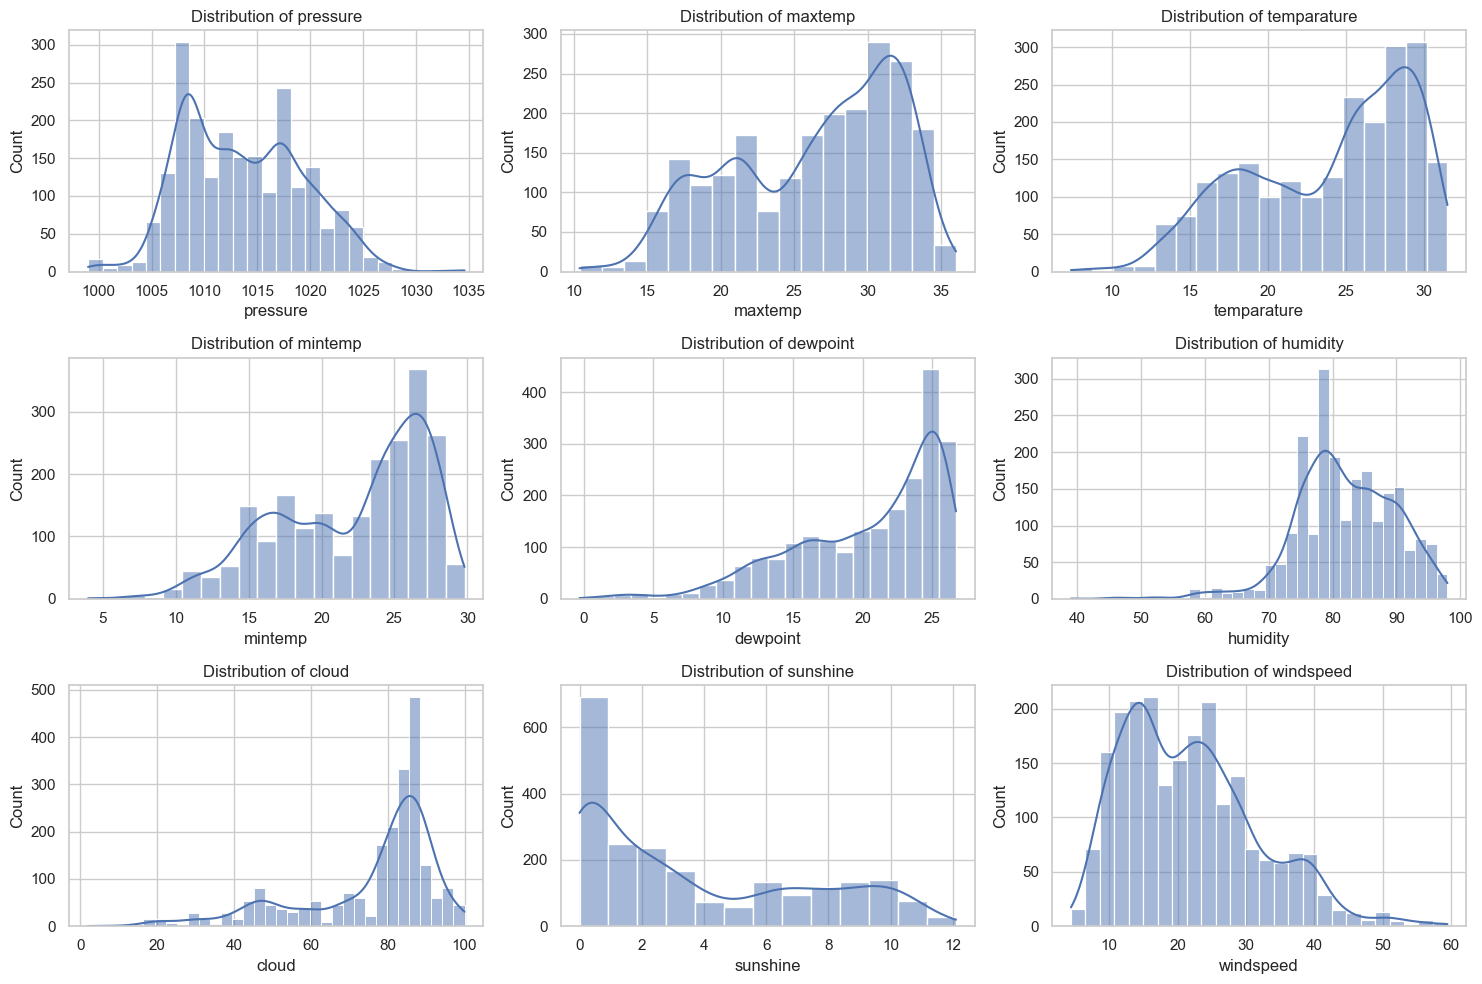

In [34]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

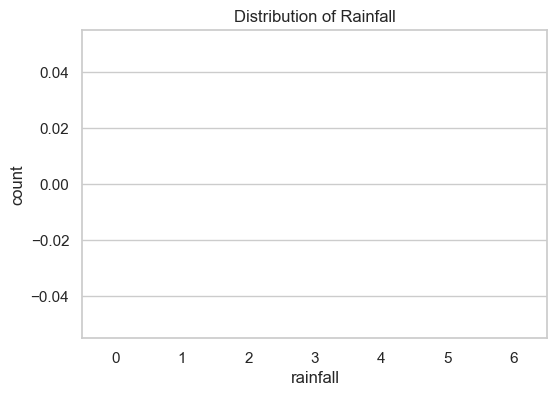

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

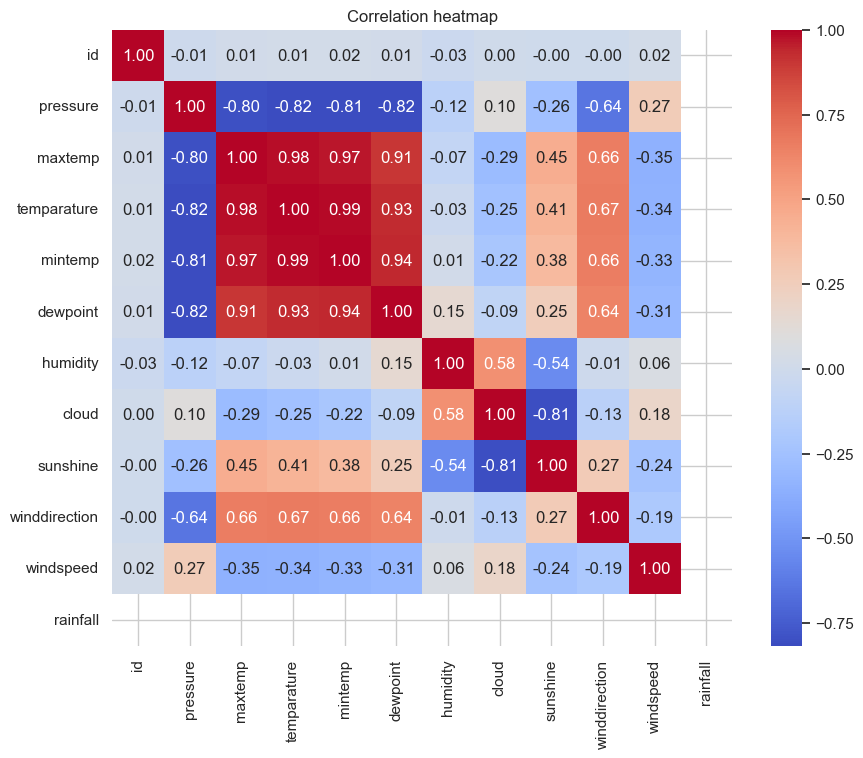

In [36]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

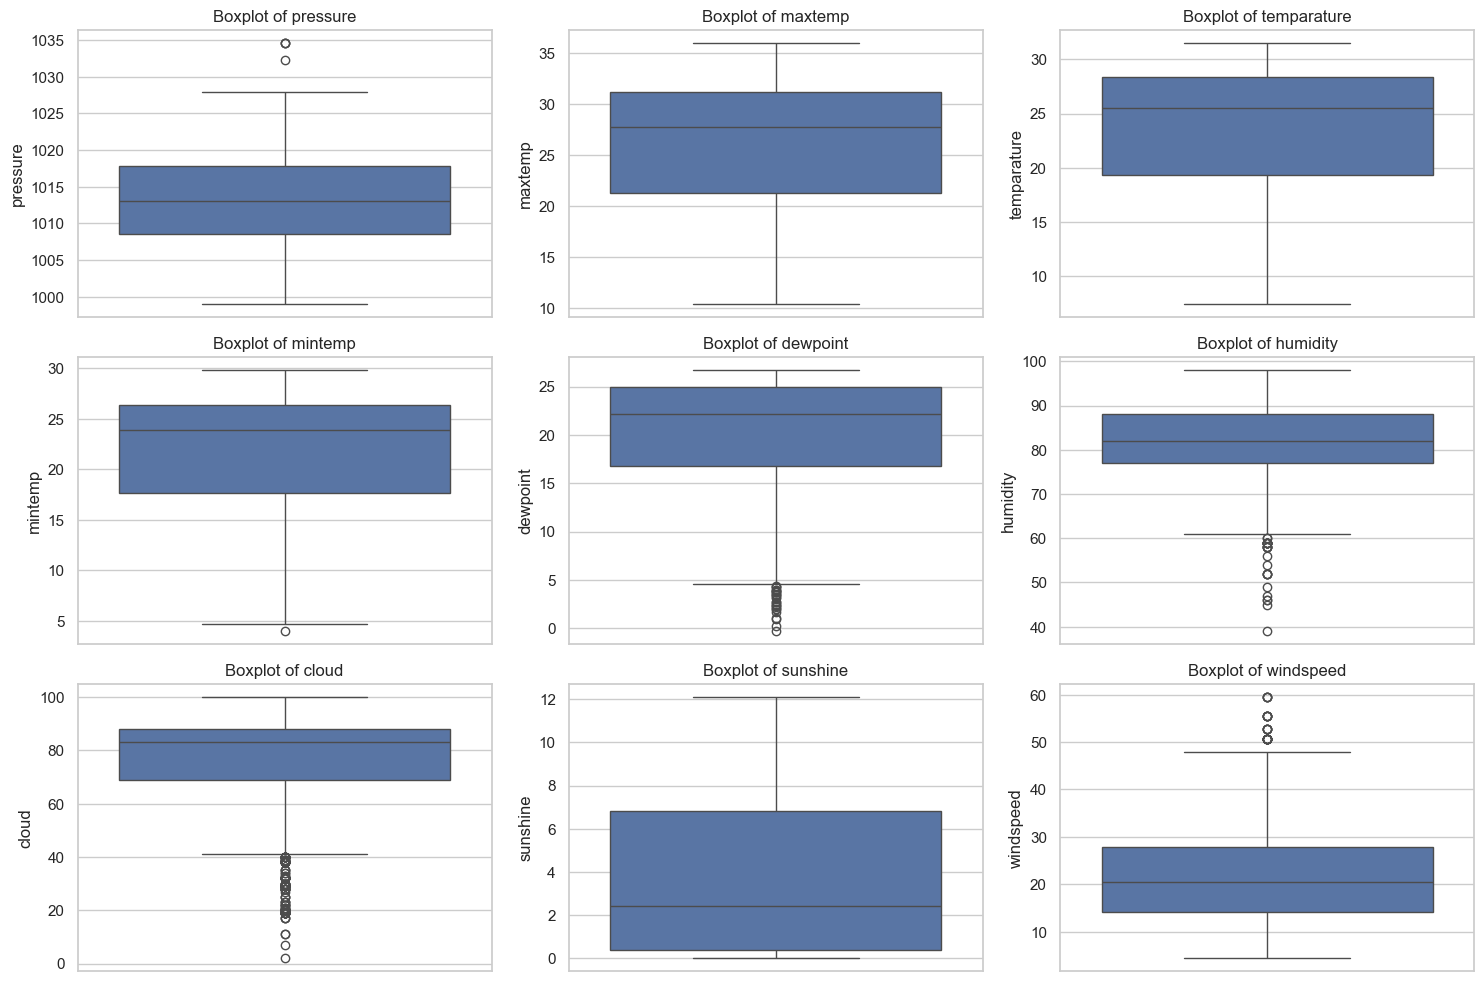

In [37]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [38]:
# drop highly correlated column
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [39]:
data.head()

,id,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1017.4,19.4,87.0,88.0,1.1,60.0,17.2,NaN
1,1,1019.5,15.4,95.0,91.0,0.0,50.0,21.9,NaN
2,2,1024.1,9.3,75.0,47.0,8.3,70.0,18.1,NaN
3,3,1013.4,16.8,95.0,95.0,0.0,60.0,35.6,NaN
4,4,1021.8,9.6,52.0,45.0,3.6,40.0,24.8,NaN


In [40]:
print(data["rainfall"].value_counts())

Series([], Name: count, dtype: int64)


In [41]:
# separate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [55]:
print(df_majority.shape)
print(df_minority.shape)

(0, 9)
(0, 9)


In [57]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [48]:
df_majority_downsampled.shape

NameError: name 'df_majority_downsampled' is not defined

In [49]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

NameError: name 'df_majority_downsampled' is not defined

In [ ]:
df_downsampled.shape

(234, 8)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
# split features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [ ]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [ ]:
# splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


**Model Evaluation**

In [ ]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [ ]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



**Prediction on unknown data**

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [ ]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [2]:
prediction = best_rf_model.predict(input_df)

NameError: name 'best_rf_model' is not defined

In [1]:
print(prediction)

NameError: name 'prediction' is not defined

In [ ]:
prediction[0]

1

In [ ]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [ ]:
# save model and feature names to a pickle file
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

**Load the saved model and file and use it for prediction**

In [ ]:
import pickle
import pandas as pd

In [ ]:
# load the trained model and feature names from the pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [ ]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [ ]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


**To Try:**
1. SMOTE for class balancing
2. PCA for dimensionality reduction
3. Simpler models like Logistic Regression (with Feature scaling)
4. Model Selection with hyperparameter tuning